# Students Performance in Exams EDA

In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')


import os
print(os.listdir("D:\\Data Science\\Dataset\\input"))

[]


In [7]:
df = pd.read_csv("D:\\Data Science\\Dataset\\74977_169835_bundle_archive\\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df['Total Score'] = df['math score'] + df['reading score'] + df['writing score']

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   Total Score                  1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [11]:
df.describe()

,math score,reading score,writing score,Total Score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


In [13]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [15]:
df['math score'].dtype

dtype('int64')

In [17]:
df['math score'] = pd.to_numeric(df['math score'], downcast ='float') # converting int to float
df['math score'].dtype

dtype('float32')

In [18]:
print("Average math score is :  {}".format(np.mean(df['math score'])))
print("Average reading score is :  {}".format(np.mean(df['reading score'])))
print("Average writing score is :  {}".format(np.mean(df['writing score'])))
print("Average total score is :  {}".format(np.mean(df['Total Score'])))

Average math score is :  66.08899688720703
Average reading score is :  69.169
Average writing score is :  68.054
Average total score is :  203.312


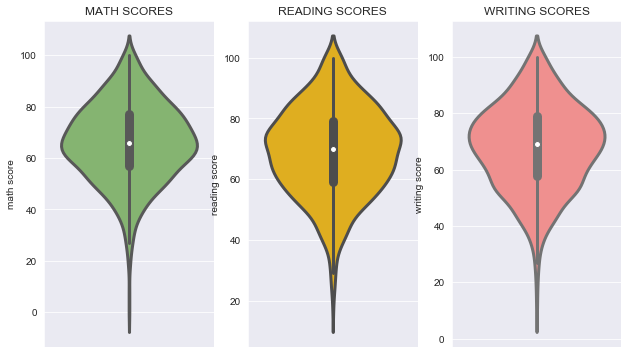

In [27]:
plt.figure(figsize=(14,6))

plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(y='math score', data=df, palette='summer', linewidth=3)

plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(y='reading score', data=df, palette='Wistia_r', linewidth=3)

plt.subplot(1,4,3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score', data=df, palette='spring', linewidth=3)

plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

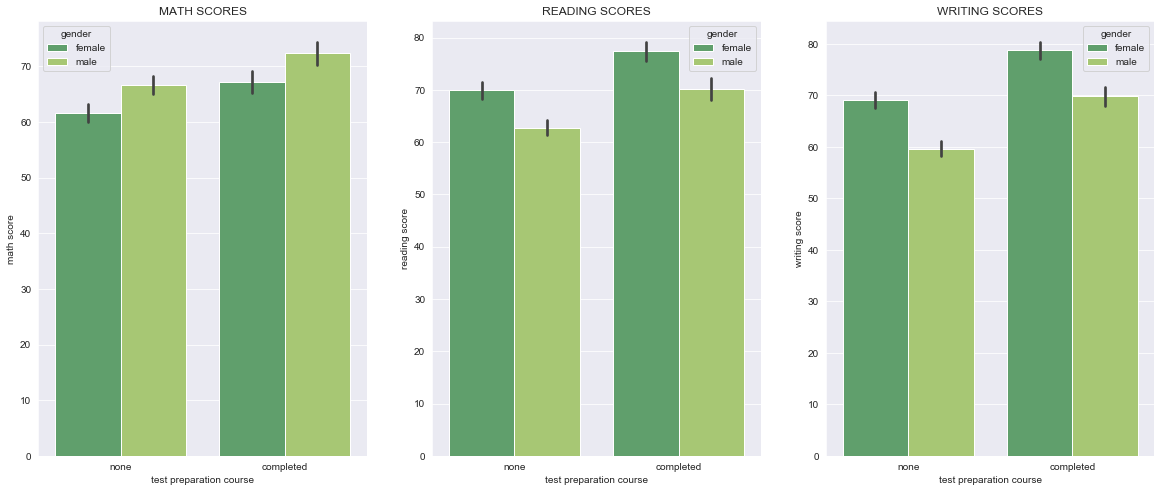

In [35]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
sns.barplot(x= 'test preparation course', y='math score', data=df,hue= 'gender', palette='summer')
plt.title('MATH SCORES')

plt.subplot(1,3,2)
sns.barplot(x= 'test preparation course', y='reading score', data=df,hue= 'gender', palette='summer')
plt.title('READING SCORES')

plt.subplot(1,3,3)
sns.barplot(x= 'test preparation course', y='writing score', data=df,hue= 'gender', palette='summer')
plt.title('WRITING SCORES')


plt.show()

# |* From the first plot we can see the math scores of boys are better irrespective of wether they completed the course or no.

From the next two plots we can see that girls perform more better in reading and writing
From all three graphs its clear that if the course is completed we can achieve higher scores

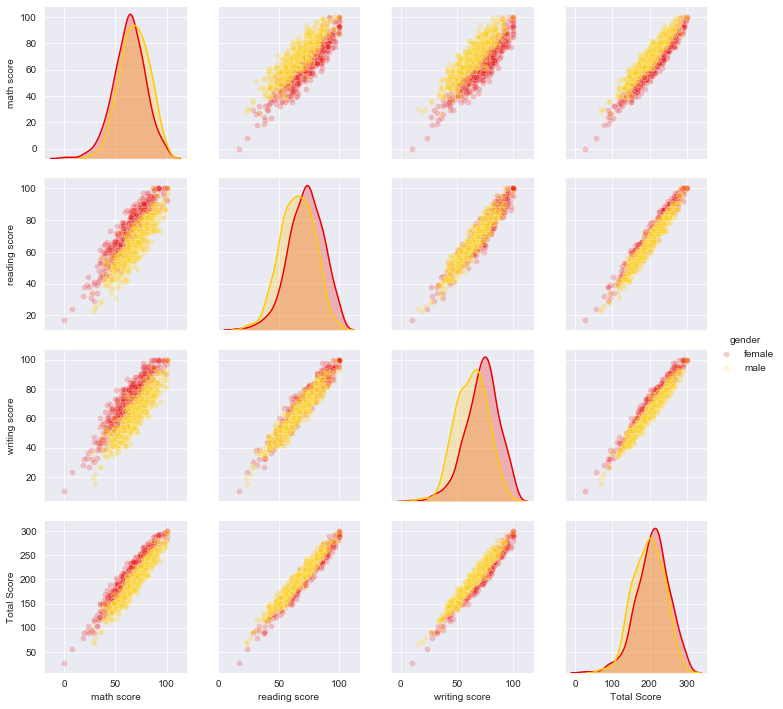

In [36]:
sns.pairplot(data=df,hue='gender',plot_kws={'alpha':0.2},palette='hot')

From the above plot it is clear that all the scores increase linearly with each other.

In [37]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

# Now lets see how lunch affects the scores

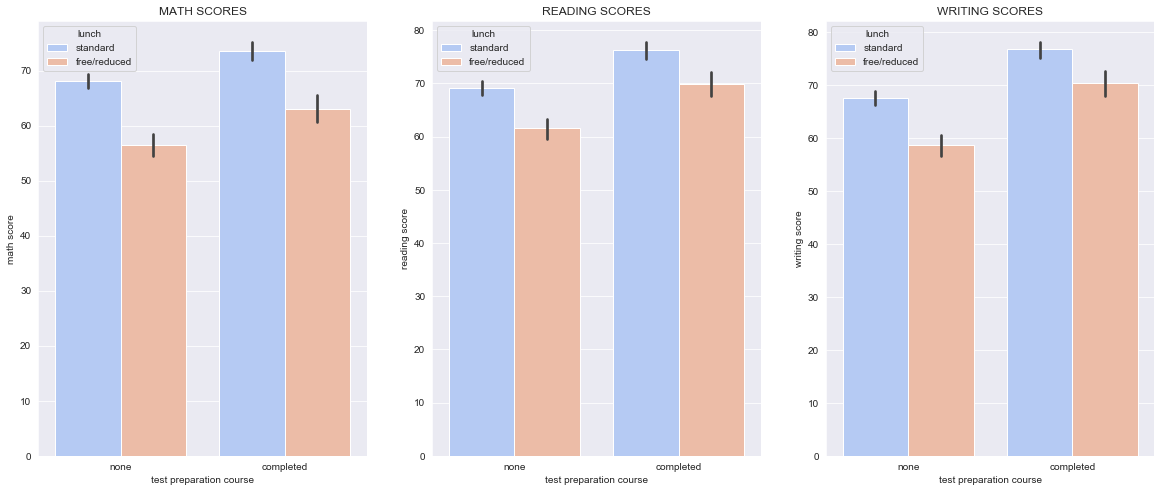

In [38]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=df,hue='lunch',palette='coolwarm')
plt.title('MATH SCORES')

plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=df,hue='lunch',palette='coolwarm')
plt.title('READING SCORES')

plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=df,hue='lunch',palette='coolwarm')
plt.title('WRITING SCORES')

plt.show()

In all the cases the scores are higher by having the standard lunch.

In [41]:
# Checking out the toppers.

df[(df['math score'] > 90) & (df['reading score'] > 90) & (df['writing score']>90)]\
.sort_values(by=['Total Score'],ascending=False)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score
962,female,group E,associate's degree,standard,none,100.0,100,100,300
458,female,group E,bachelor's degree,standard,none,100.0,100,100,300
916,male,group E,bachelor's degree,standard,completed,100.0,100,100,300
114,female,group E,bachelor's degree,standard,completed,99.0,100,100,299
179,female,group D,some high school,standard,completed,97.0,100,100,297
712,female,group D,some college,standard,none,98.0,100,99,297
625,male,group D,some college,standard,completed,100.0,97,99,296
165,female,group C,bachelor's degree,standard,completed,96.0,100,100,296
903,female,group D,bachelor's degree,free/reduced,completed,93.0,100,100,293
149,male,group E,associate's degree,free/reduced,completed,100.0,100,93,293


The first two toppers are either geniuses or they did some malpractice as their test preparation course was none.

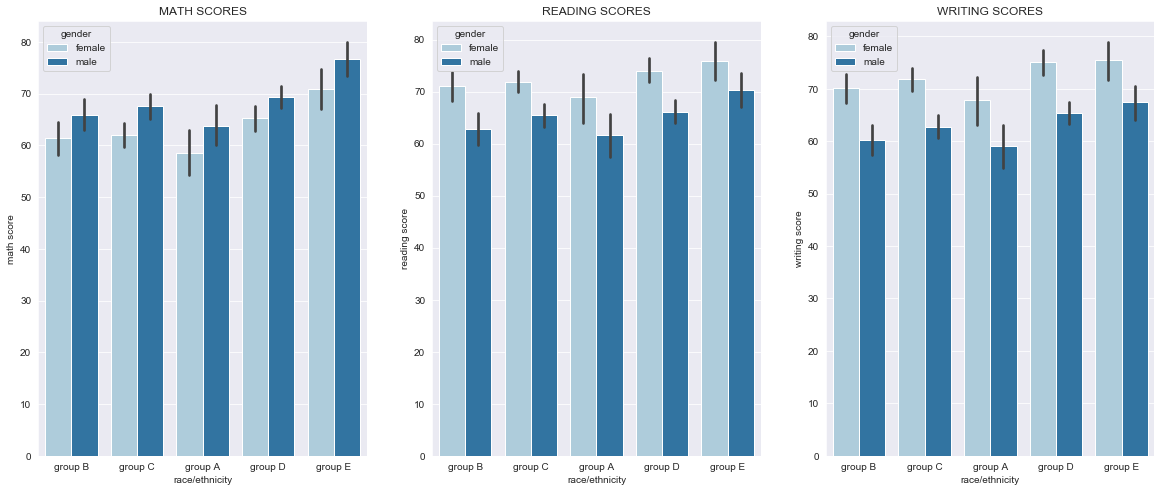

In [42]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.barplot(x='race/ethnicity',y='math score',data=df,hue='gender',palette='Paired')

plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.barplot(x='race/ethnicity',y='reading score',data=df,hue='gender',palette='Paired')

plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.barplot(x='race/ethnicity',y='writing score',data=df,hue='gender',palette='Paired')

plt.show()

The above plot shows in depth how people score from different groups.

In [43]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Total Score'],
      dtype='object')

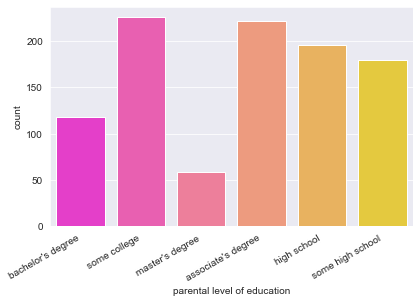

In [44]:
fig,ax=plt.subplots()
sns.countplot(x='parental level of education',data=df,palette='spring')
plt.tight_layout()
fig.autofmt_xdate()

Thw above plot shows most of the parents went to some college or had associate's degree and there are very less people who had higher studies.

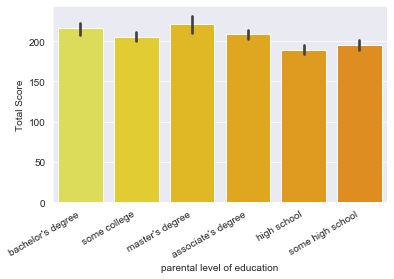

In [46]:
fig,ax=plt.subplots()
sns.barplot(x=df['parental level of education'],y='Total Score',data=df,palette='Wistia')
fig.autofmt_xdate()

From the above plot its clear that if the parental education is better their children tend to score better in all areas (math, reading, writing).